In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as sdt

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv("../data/02-tiburon_4.csv", index_col = 0)
df

,year,country,activity,age,species_,mes,deceso,genero
0,2018,usa,Paddling,57.0,White,Jun,N,F
1,2018,brazil,Swimming,18.0,Tiger,Jun,Y,M
2,2018,usa,Walking,15.0,Bull,May,N,M
3,2018,australia,Feeding sharks,32.0,Grey,May,N,M
4,2018,england,Fishing,21.0,Unspecified,May,N,M
...,...,...,...,...,...,...,...,...
1667,0,australia,Diving,NaN,Unspecified,NaN,Y,M
1668,0,australia,Pearl diving,NaN,Unspecified,NaN,Y,M
1669,0,usa,Swimming,NaN,Unspecified,NaN,Y,M
1670,0,panama,NaN,NaN,Unspecified,NaN,Y,M


# Pair Programming EDA III

Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.

# Hipótesis

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?
- ¿Cuáles son las edades que más sufren ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:

# Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [5]:
plt.rcParams["figure.figsize"] = (10,8) #para el tamaño

import warnings
warnings.filterwarnings('ignore') # para los errores

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

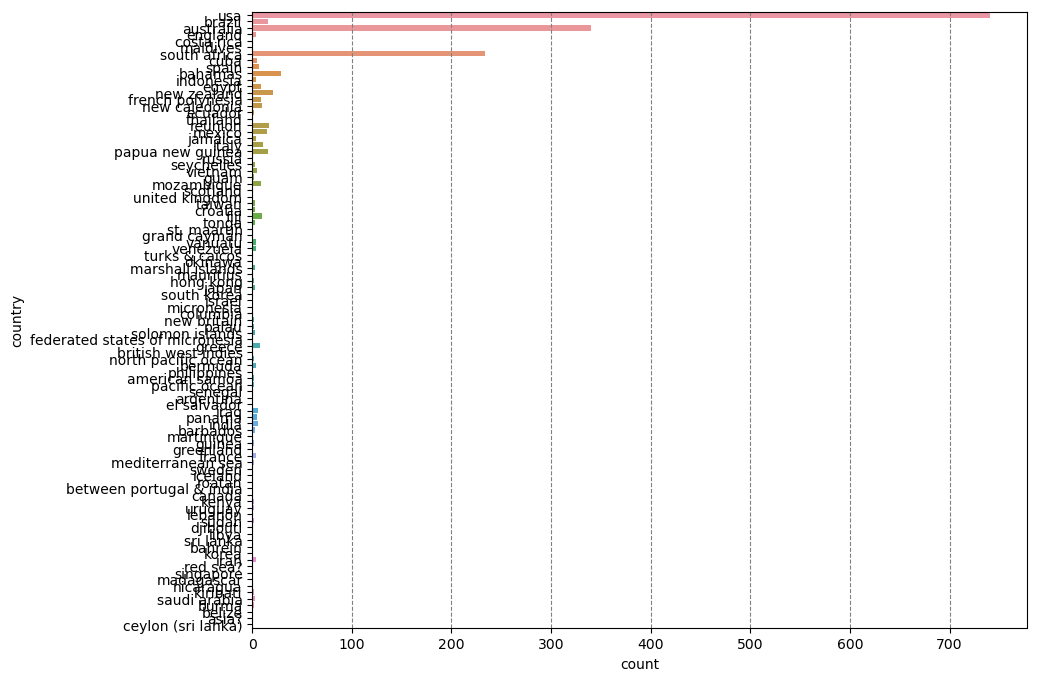

In [22]:
plt.figure()
sns.countplot(y = df["country"], data = df)
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.show()

# Conclusion: 

La gráfica obtenida es ilegible, necesitamos o reducir paises o aumentar el tamaño de la grafica, pero nos pedian que todas tuvieran el mismo tamaño.

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que **no**, seleccionad solo los **10 paises** con más ataques y volved a hacer el plot.
 

In [7]:
# creamos una lista con los 10 paises pedidos, con mayor número de ataques.( colocamos el index para que nos salgan lso nombres de los paises no los valores)
lista_paises = list(df.country.value_counts()[0:10].index)

In [8]:
#creamos un nuevo DF que contiene solo los paises de la lista
df_p_10 = df.loc[df['country'].isin(lista_paises)]

In [9]:
df_p_10.country.value_counts() # comprobamos

usa                 741
australia           340
south africa        234
bahamas              29
new zealand          21
reunion              17
brazil               16
papua new guinea     16
mexico               15
italy                11
Name: country, dtype: int64

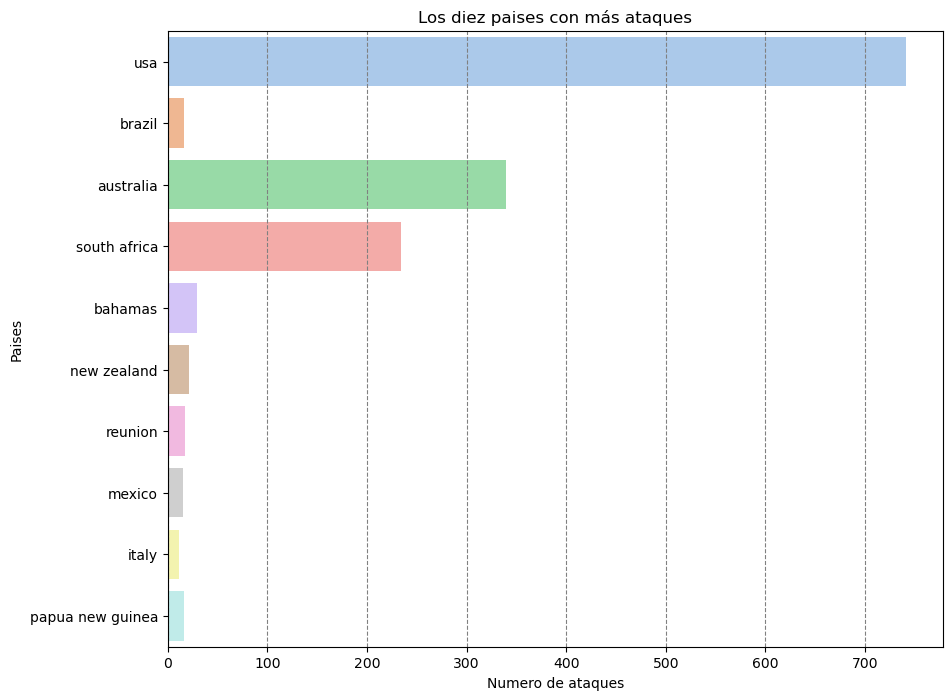

In [24]:
plt.figure() 
sns.countplot(y = "country", data = df_p_10, palette = 'pastel')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.title( 'Los diez paises con más ataques')
plt.xlabel('Numero de ataques')
plt.ylabel('Paises')
plt.show()

Conclusion : El pais con más ataques es Usa seguido por australia y sudafrica, el resto tienen un numero de ataques no reseñable.

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

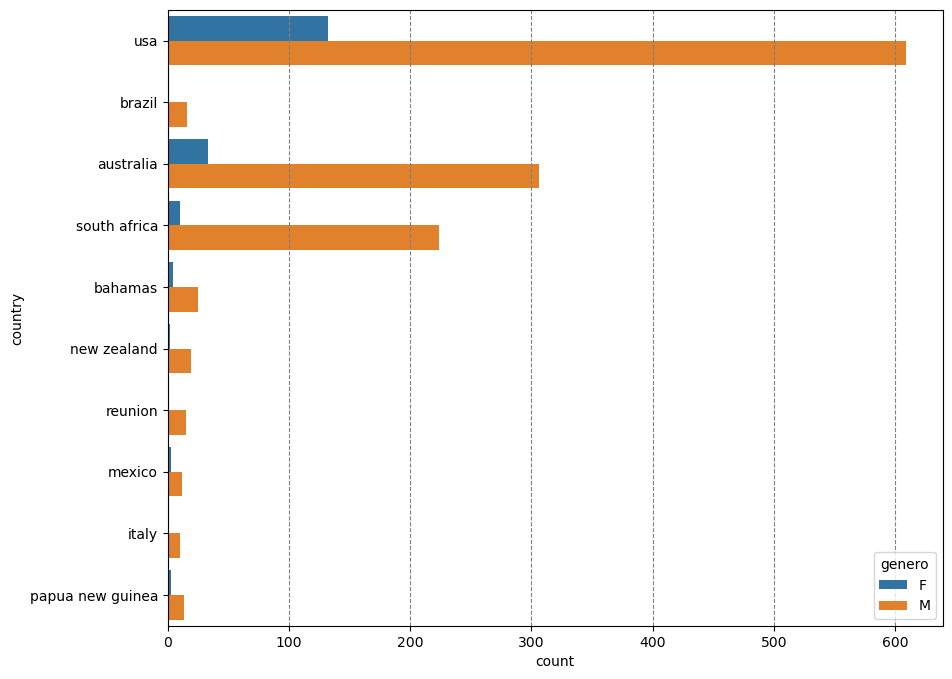

In [11]:
plt.figure()
sns.countplot(y = "country", data = df_p_10, hue = 'genero')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
plt.show()

Conclusión: Los hombres reciben más ataques de tiburones. 

- ¿Qué edad recibe mayor número de ataques?
 
            💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. 

            Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.
 

In [12]:
df.head(1)

,year,country,activity,age,species_,mes,deceso,genero
0,2018,usa,Paddling,57.0,White,Jun,N,F


In [13]:
df['rango_edad'] = pd.cut(df['age'], 5, labels = ['muy joven','joven','adulto', 'mayor','anciano'])
df.head(1)

,year,country,activity,age,species_,mes,deceso,genero,rango_edad
0,2018,usa,Paddling,57.0,White,Jun,N,F,mayor


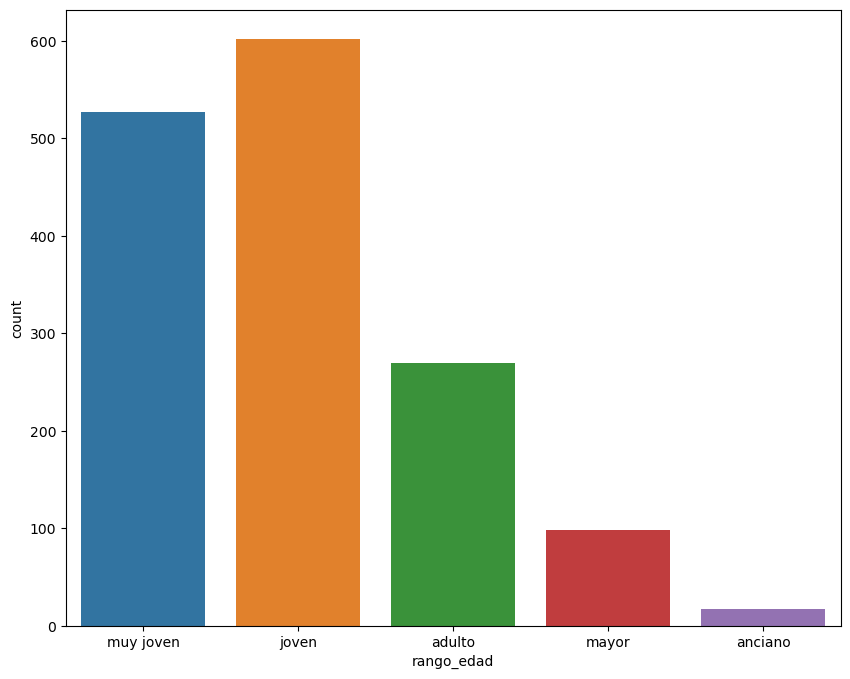

In [14]:
plt.figure()
sns.countplot(x = "rango_edad", data = df)
plt.show()

Conclusión: Se aprecia que entre los rangos de edad, los de edades más jovenes tienen más ataques, mientras que apartir de cierta edad estos se reducen.

- Ataques entre sexos, ¿hay diferencia?

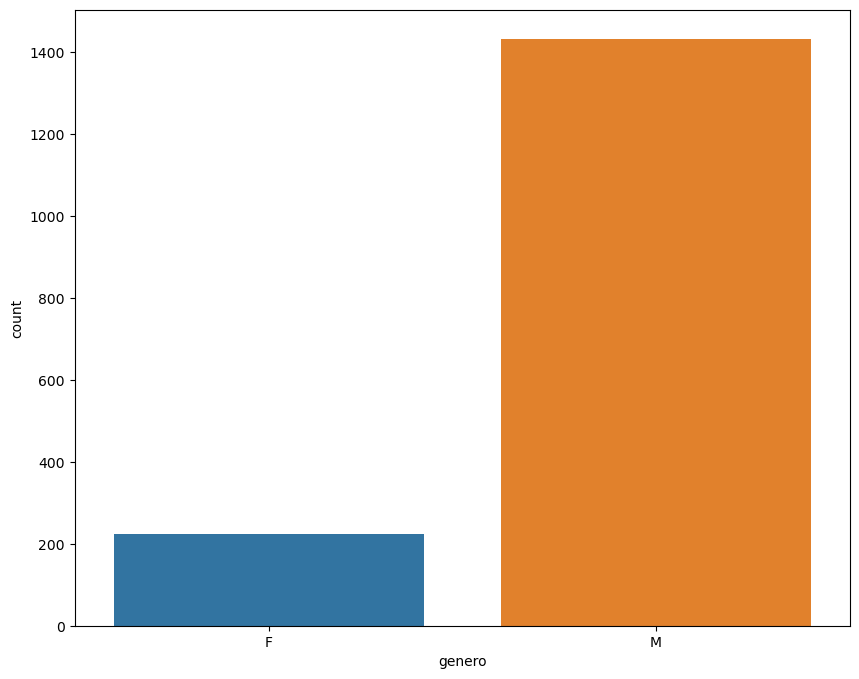

In [15]:
plt.figure()
sns.countplot(x = "genero", data = df)
plt.show()

Conclusión: como llevamos viendo en todas las gráficas obtenidas los hombres reciben más ataques, confirma nuestras conclusiones.

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

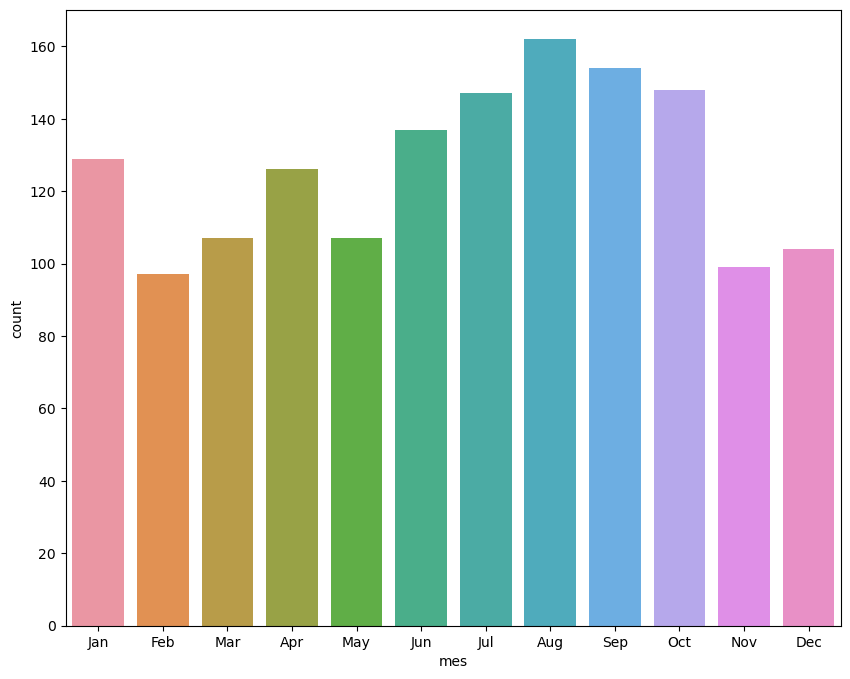

In [21]:
plt.figure()
sns.countplot(x = "mes", data = df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

Conclusiones : Podemos ver que entre junio y octubre es cuando ocurren más ataques.

Hacemos un swarmplot para ver mejor las diferencias de los ataques por sexo y edad.

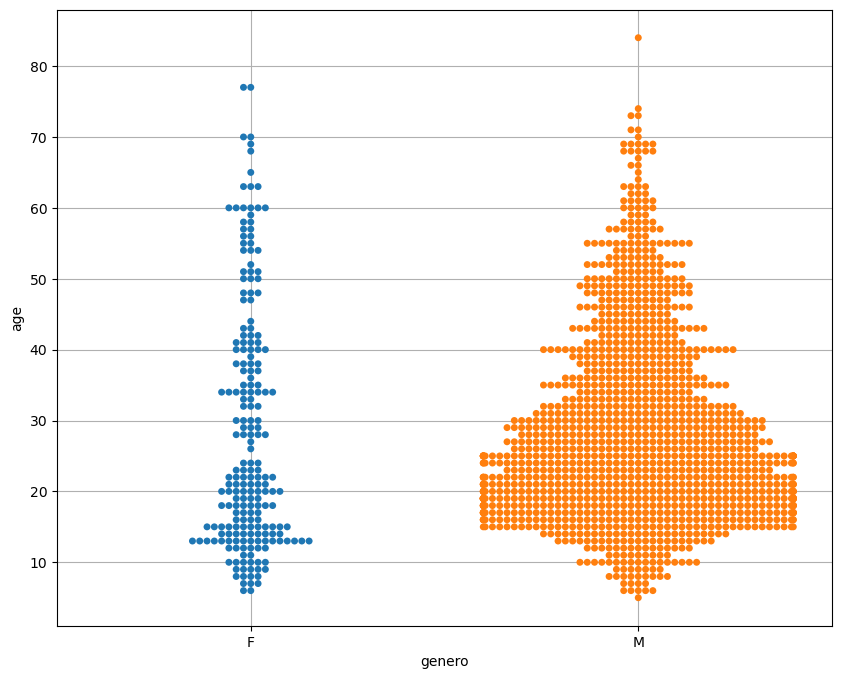

In [28]:
sns.swarmplot('genero', 'age', data=df)
plt.grid ();

Conclusión : podemos ver que hay muchos mas ataques a hombres entre las edades de 15 a 30. 